In [1]:
import umap
import os
import brie
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def volcano(adata, x="cell_coeff", y="ELBO_gain", index=0, score_red=4, 
            n_anno=10, anno_id='index', log_y=None, clip_y_min=0, adjust=True):
    """Volcano plot for p values and weights

    Parameters
    ----------
    adata: AnnData
        The input AnnData, containing varm[x] and varm[y]
    x: str
        The tag in adata.varm for presenting in x-axis
    y: str
        The tag in adata.varm for presenting in y-axis
    index: int
        The index to present, used as adata.varm[x|y][:, index]
    score_red: float
        The cutoff score for highlighting in red
    n_anno: int
        Number of top hits to add names
    anno_id: str
        The tag id of the adata.var to use as var name
    log_y: bool
        If True, show y axis as log scale
    clip_y_min: float
        Clipping y at lower bound
    adjust: bool
        If True, adjust the annotation position

    Examples
    --------
    brie.pl.volcano(adata, x="cell_coeff", y="ELBO_gain", score_red=4)
    brie.pl.volcano(adata, x="cell_coeff", y="pval", score_red=0.0001)
    brie.pl.volcano(adata, x="cell_coeff", y="FDR", score_red=0.0001)
    """
    xval = adata.varm[x][:, index]
    yval = adata.varm[y][:, index]

    if clip_y_min is not None:
        yval[yval < clip_y_min] = clip_y_min
    
    if y == 'ELBO_gain':
        idx = yval > score_red
        idx_anno = np.argsort(yval)[-n_anno:]
        y_label = str(y)
    else:
        idx = yval < score_red
        idx_anno = np.argsort(yval)[:n_anno]
        if log_y is None or log_y is True:
            y_label = "-log10(%s)" %(y)
            yval = -np.log10(yval)
        else:
            y_label = str(y)
    
    plt.scatter(xval[~idx], yval[~idx], color="gray")
    plt.scatter(xval[idx], yval[idx], color="firebrick")
    
    lable = adata.var.index if anno_id is 'index' else adata.var[anno_id]
    
    texts = []
    for i in idx_anno:
        _label = lable[i]
        _xx = xval[i]
        _yy = yval[i]
        texts.append(plt.text(_xx, _yy, _label, size=12))
    
    if adjust and n_anno > 0:
        from adjustText import adjust_text
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    
    plt.xlabel(x)
    plt.ylabel(y_label)

<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_643583/3070981731.py:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
  lable = adata.var.index if anno_id is 'index' else adata.var[anno_id]


In [3]:
plt.rcParams['font.size']=13

In [4]:
print(brie.__version__)

2.2.2


In [5]:
def plot_volcano(timepoint):
    inputpath='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/run_BRIE/Brie_out/brie_muscle_'+timepoint+'.h5ad'
    adata=sc.read(inputpath)
    adata.var.index=adata.var['gene_name']
    ## volcano plot for differential splicing events
    
    fig = plt.figure(figsize=(4.5, 3.5), dpi=300)
    volcano(adata, y='ELBO_gain', log_y=False, n_anno=16, score_red=7, adjust=True)
    plt.xlabel('cell_coeff: effect size on logit(Psi)')
    title=timepoint+' vs other timepoint in muscle cells'
    plt.title(title)
    #outputfile='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_forelimb/figure/valcano_plot/'+timepoint+'_muscle_volcano.pdf'
    #fig.savefig(outputfile,bbox_inches='tight',dpi=300)
    plt.show()
    

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


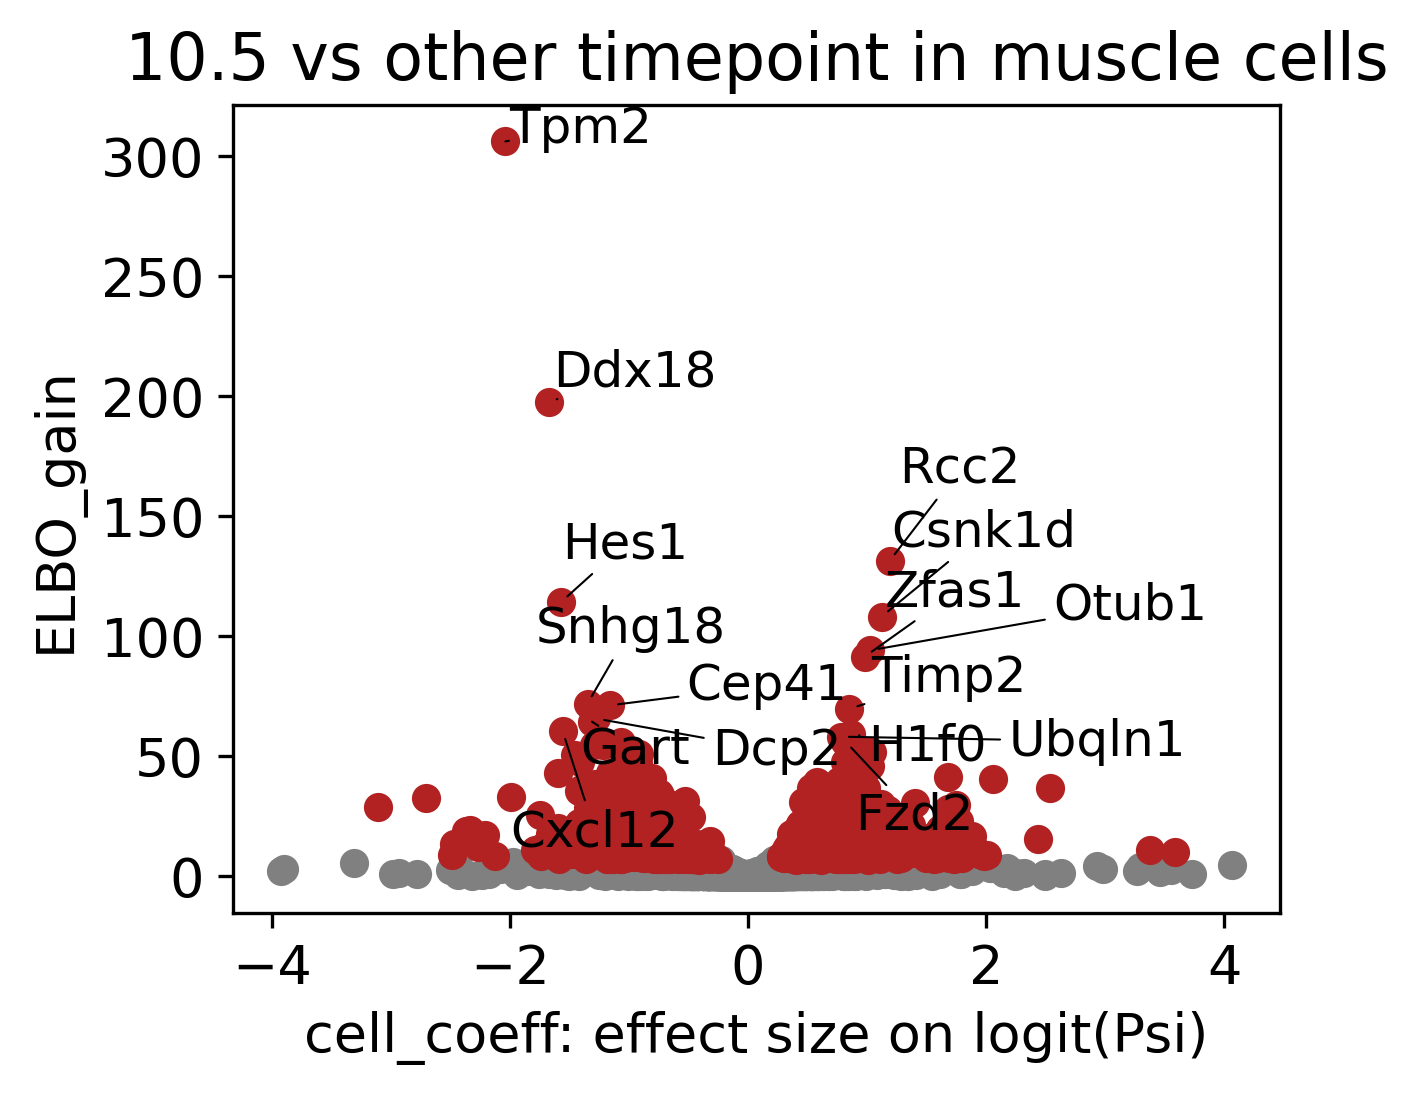

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


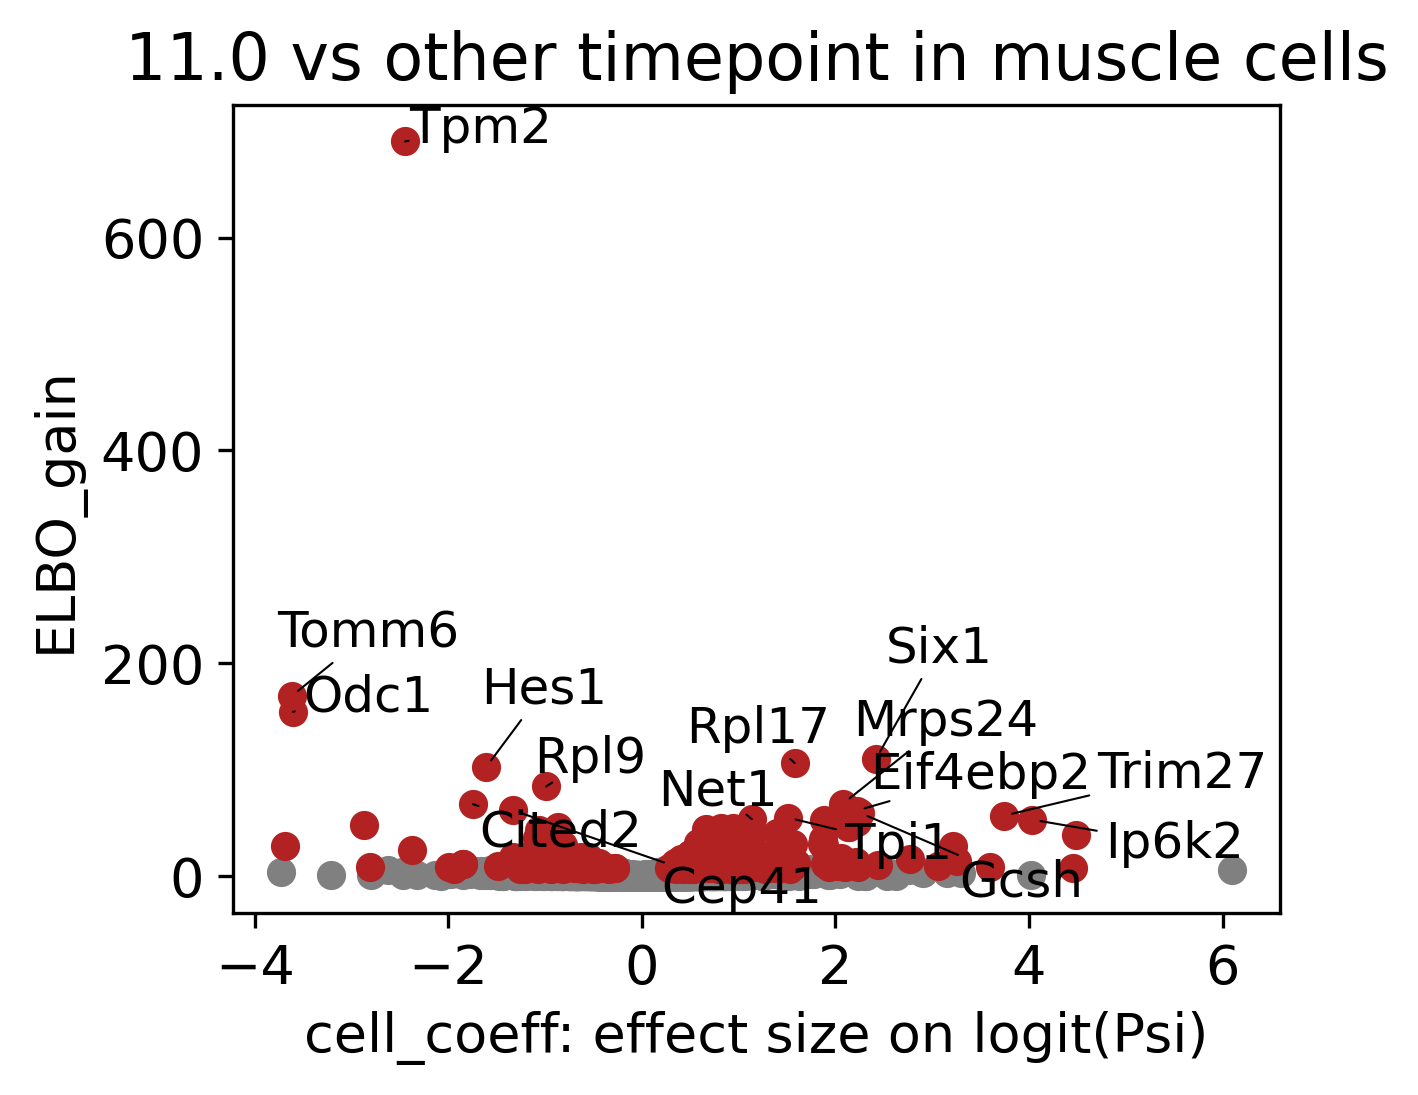

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


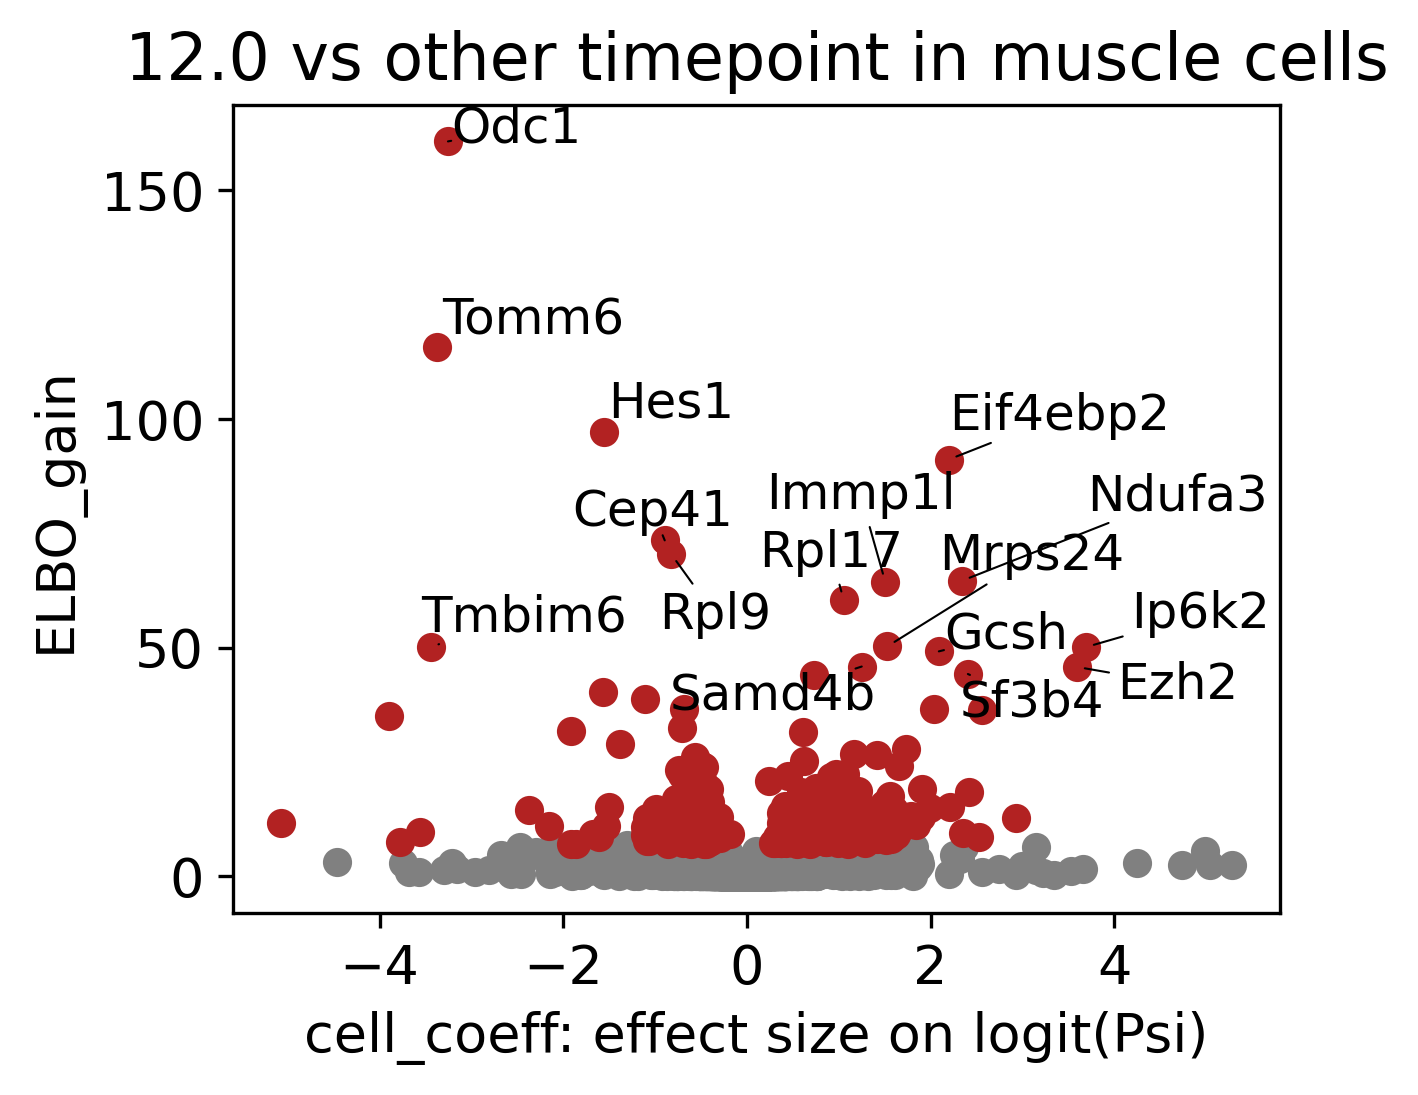

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


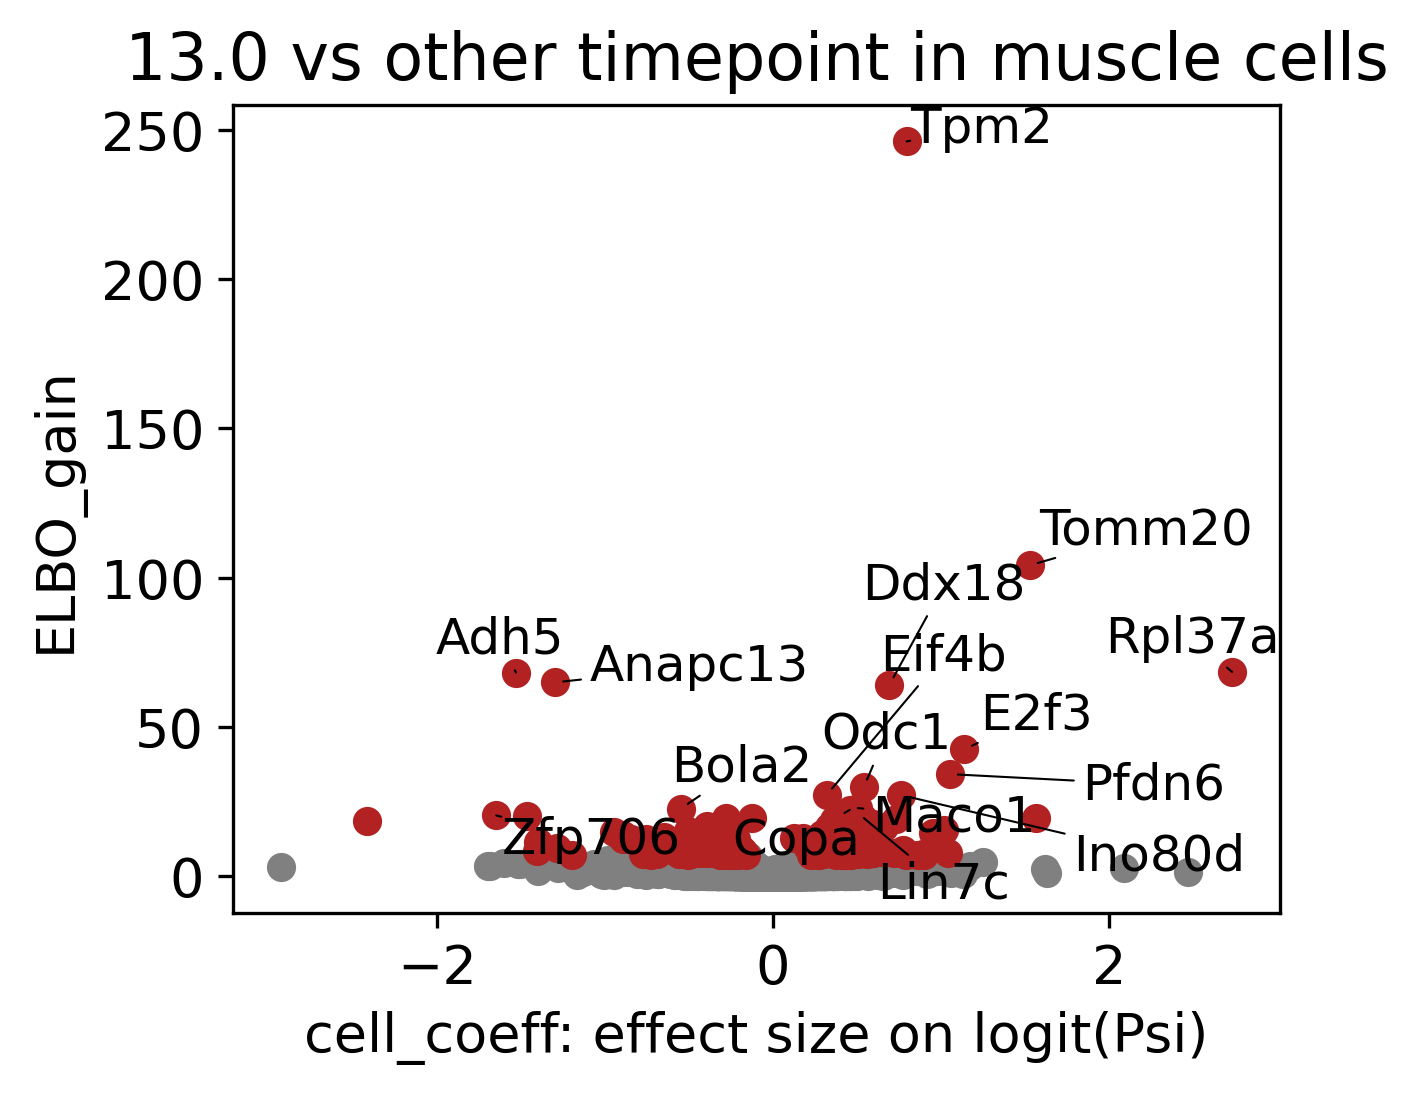

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


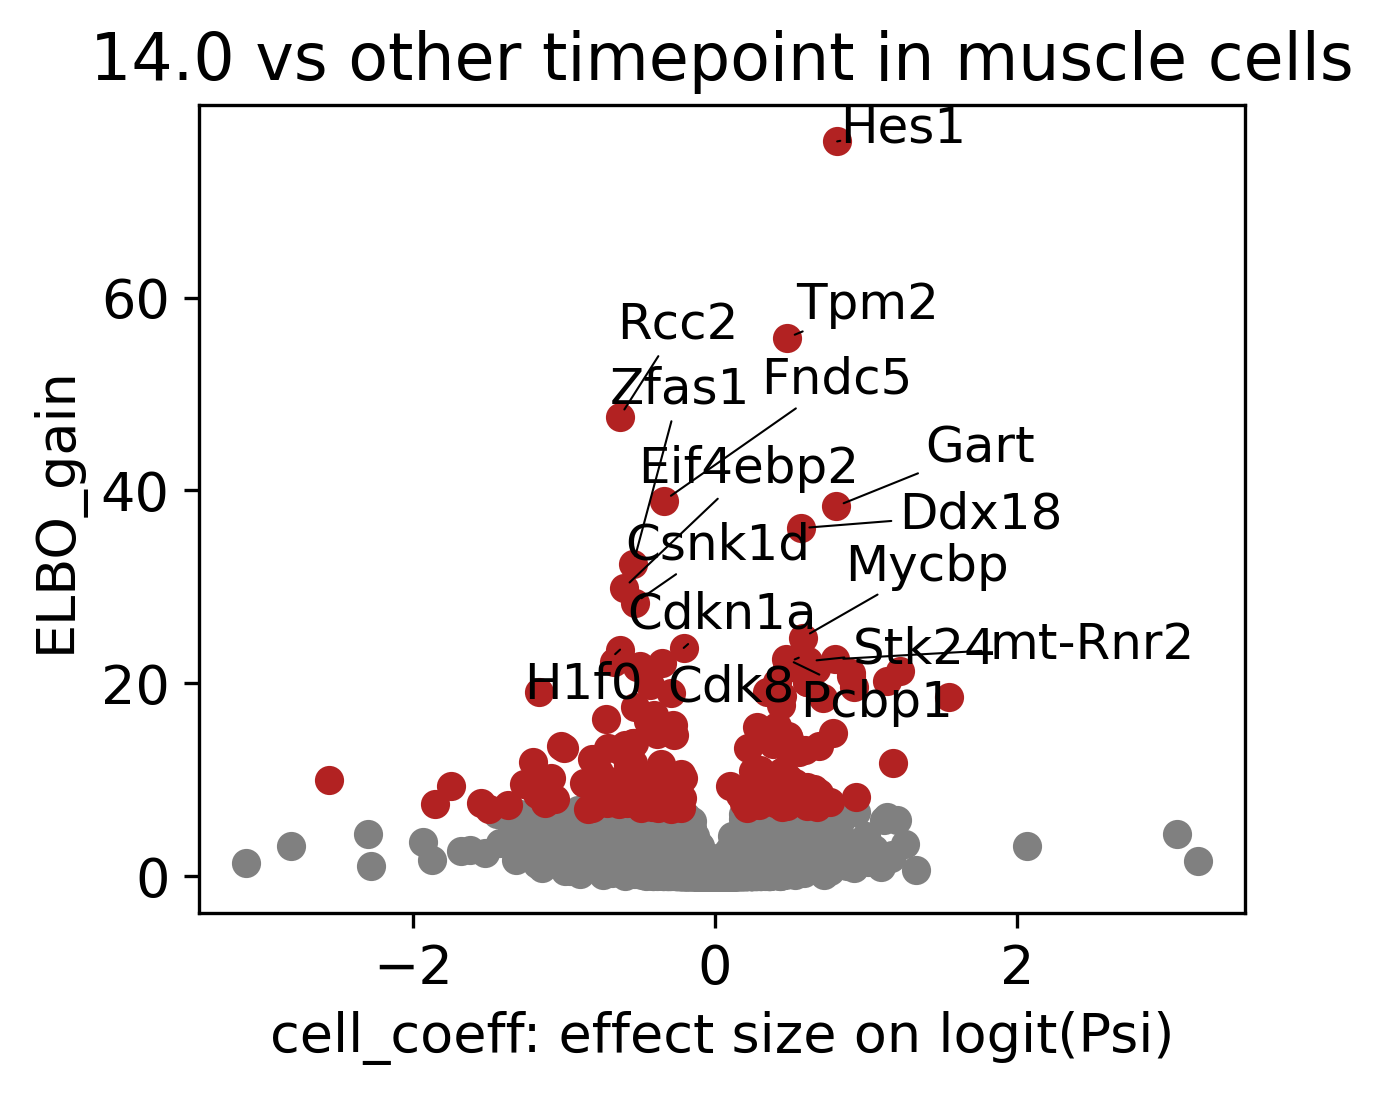

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


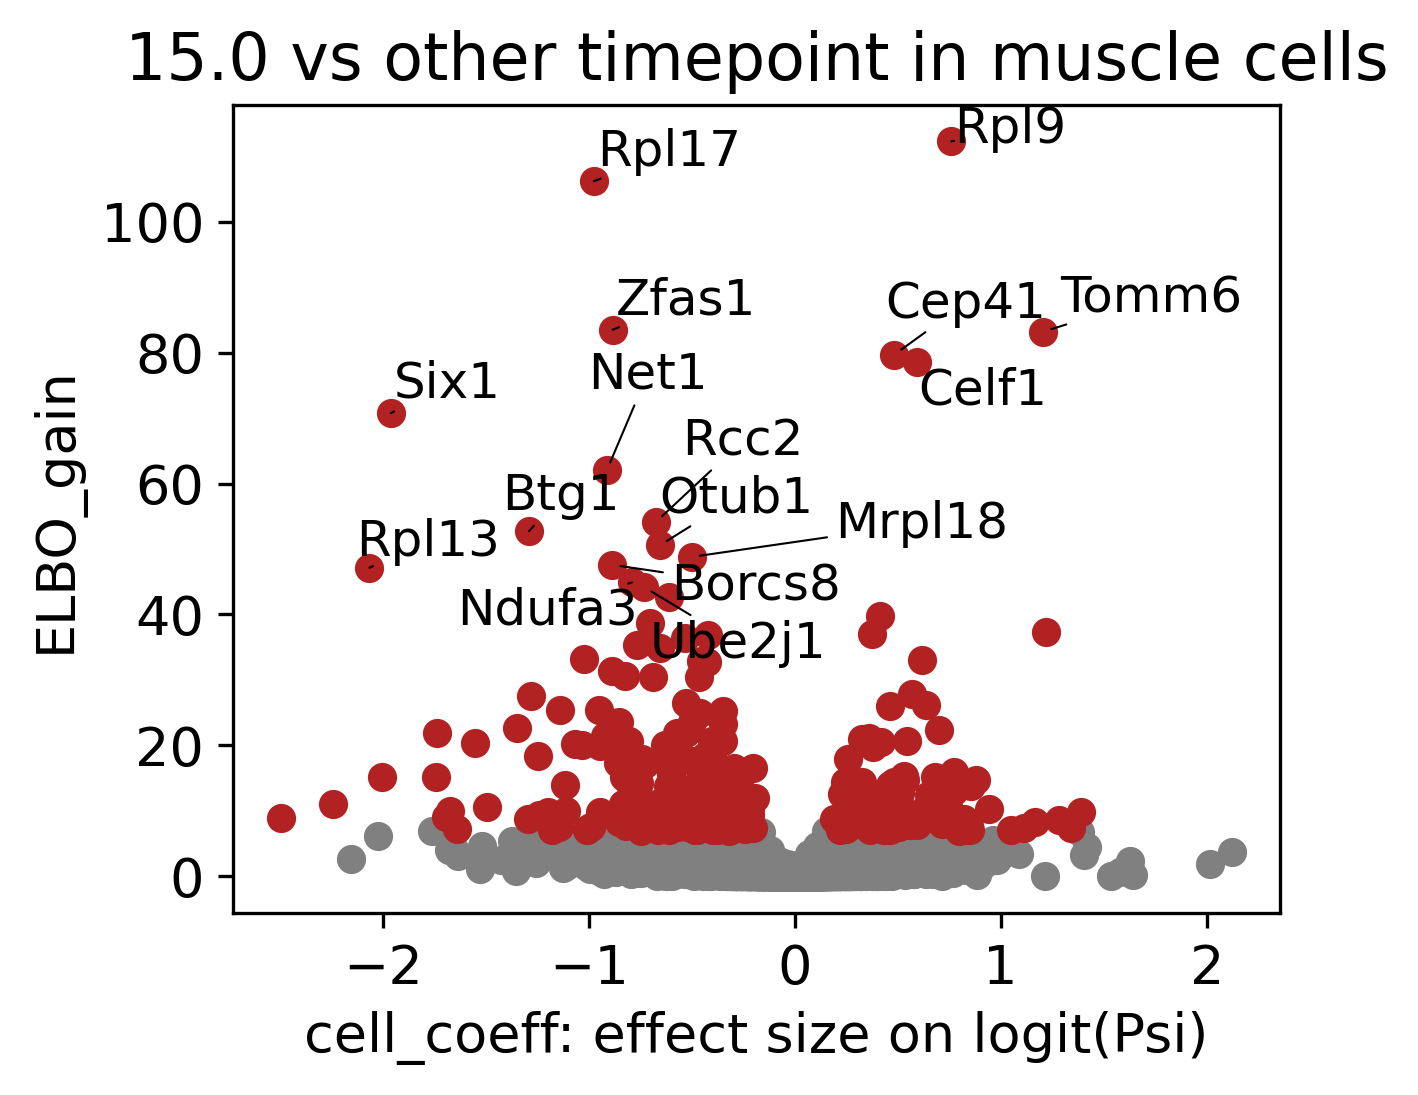

In [6]:
for timepoint in ['10.5','11.0','12.0','13.0','14.0','15.0']:
    plot_volcano(timepoint)